G05: Jakober, Winkler, Matzinger, Salzmann

In [1]:
import numpy as np
import torch
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### Utilities

The test function that is used for illustrating the workings of the optimisers.

In [2]:
def test_function(x):
    return x[0]**2/15.0+x[1]**2

Utility for plotting the contours of a given function`f` in a range `r` (4-tuple) and 20 levels up to a max level given by `s`. 

In [3]:
def plot_contours(r, s, f, ax=plt):
    matplotlib.rcParams['xtick.direction'] = 'out'
    matplotlib.rcParams['ytick.direction'] = 'out'
    delta = 0.01
    X = np.arange(r[0], r[1], delta)
    Y = np.arange(r[2], r[3], delta)
    X,Y = np.meshgrid(X, Y)  
    XX = np.stack((X,Y), axis=0)
    Z=f(XX)
    V=np.arange(0.2,s,s/20)**2
    #CS = plt.contour(X, Y, Z, V, colors=colors)
    #plt.clabel(CS, inline=1, fontsize=10)
    ax.contour(X, Y, Z, V)

Optimisation (i.e. minimisation) of the function `f` starting at `x` (pytorch tensor), by using the given `optimizer` over `n_epochs`.

In [4]:
def optimize(f, x, n_epochs, optimizer):
    params = [x,]
    xhist = [x[0].item()]
    yhist = [x[1].item()]
    optimizer.param_groups[0]['params'] = params
    for i in range(n_epochs):
        y = f(x)
        optimizer.zero_grad()
        y.backward()
        optimizer.step()
        xhist.append(x[0].item())    
        yhist.append(x[1].item())
    return xhist, yhist

RMS error for measuring the discrepancy to the final target (for the test function above it is (0,0). 

In [5]:
def error(xhist,yhist):
    x,y = xhist[-1], yhist[-1]
    return "%6.3f, (%6.3f, %6.3f)"%(np.sqrt(x**2+y**2),x,y)

### Sample Run

SGD - lr=0.3   1.326, (-1.326, -0.000)


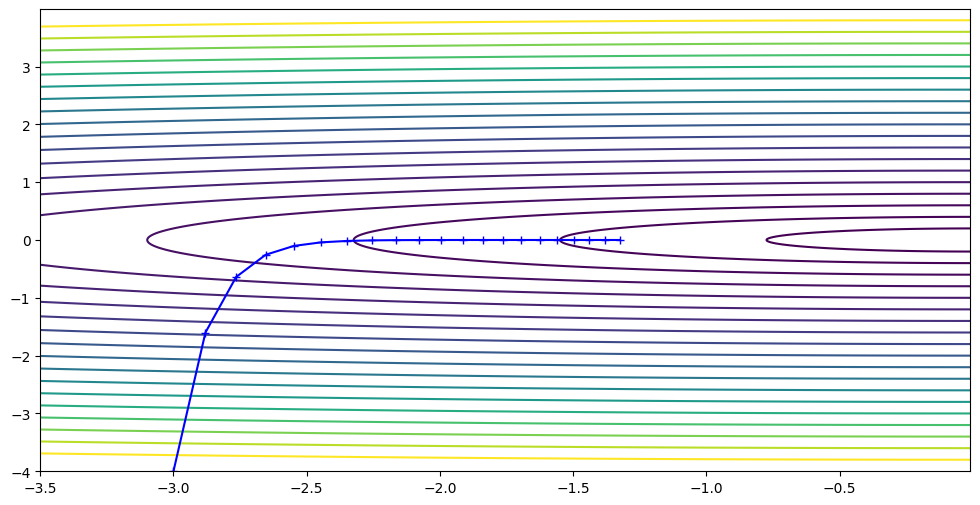

In [6]:
n_epochs = 20

plt.figure(1,figsize=(12,6))
plot_contours([-3.5,0.,-4.,4.], 4., test_function)

# initial value
x = torch.tensor([-3.0,-4.0]).requires_grad_()

optimizer = torch.optim.SGD([x],lr=.3)
xhist, yhist = optimize(test_function, x, n_epochs, optimizer)  

plt.plot(xhist,yhist,"b-+", label="lr=0.3")
print("SGD - lr=0.3 ", error(xhist,yhist))

### Tasks 

For better comparison, always use the same (non-optimal) initial point (-3,-4).

* Study SGD for different learning rates. Illustrate the behavior as learned and analysed in week 02.
* Compare Momentum for different momentum parameters ($\beta_1$) and characterise how the optimisation paths qualitatively change.
* Can you spot a difference with / without Nesterov?
* Compare RMSProp for different parameters $\beta_2$ and characterise how the optimisation paths qualitatively change.
* Finally, check different settings for Adam. Identify your best parameters that allows you to get closest the minimum in 25 epochs and with an error of at max 1.0e-3?


### a) Different `lr` for SGD

SGD - lr=0.3, error: 1.326, (-1.326, -0.000)
SGD - lr=0.6, error: 0.566, (-0.566, -0.000)
SGD - lr=0.9, error: 0.237, (-0.233, -0.046)


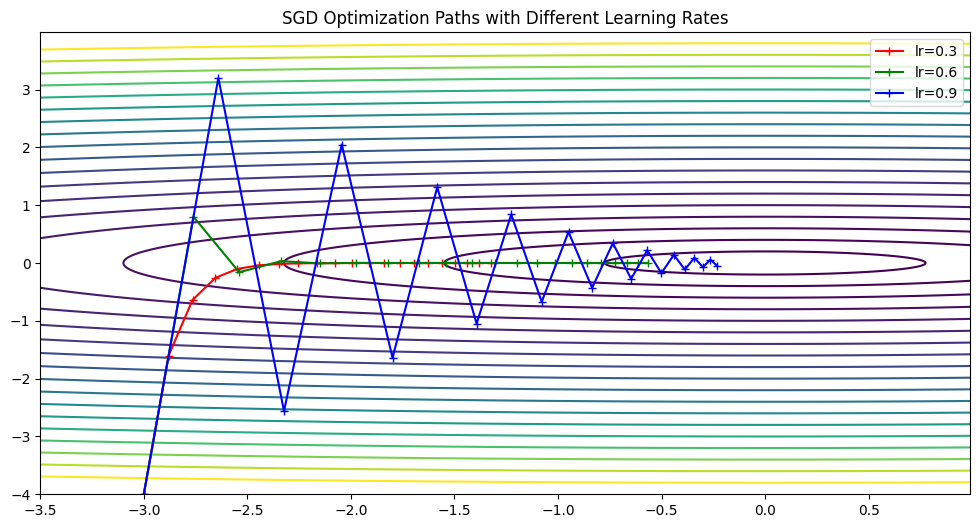

In [7]:
n_epochs = 20

plt.figure(1, figsize=(12,6))
plot_contours([-3.5, 1., -4., 4.], 4., test_function)

learning_rates = [0.3, 0.6, 0.9]
colors = ['r', 'g', 'b']

for lr, color in zip(learning_rates, colors):
    x = torch.tensor([-3.0,-4.0], requires_grad=True)
    optimizer = torch.optim.SGD([x],lr=lr)

    xhist, yhist = optimize(test_function, x, n_epochs, optimizer)

    plt.plot(xhist, yhist, color=color, marker='+', label=f'lr={lr}')
    print(f'SGD - lr={lr}, error:{error(xhist, yhist)}')

plt.legend()
plt.title('SGD Optimization Paths with Different Learning Rates')
plt.show()

### b) Different momentum parameters $\beta_1$

SGD - beta_1=0.0, error: 1.002, (-1.002, -0.000)
SGD - beta_1=0.3, error: 0.602, (-0.602,  0.000)
SGD - beta_1=0.6, error: 0.073, (-0.072,  0.011)


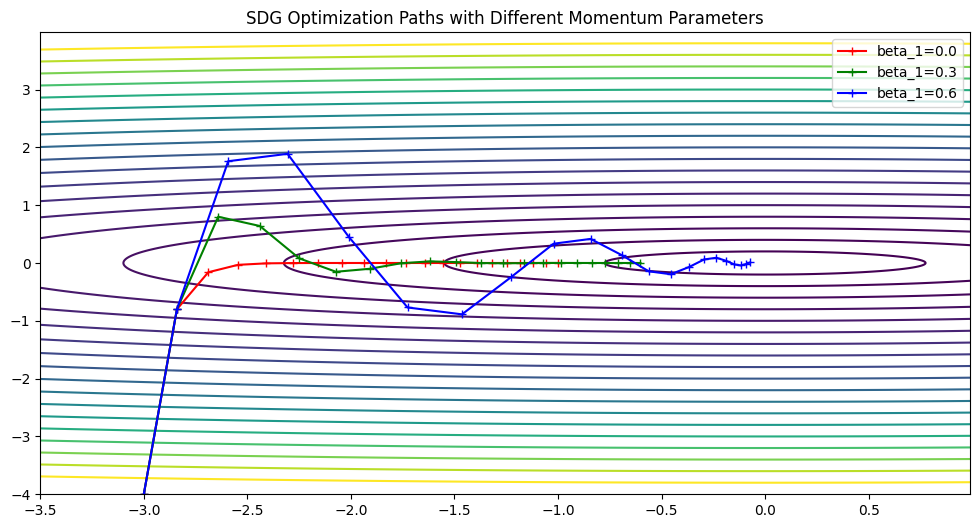

In [8]:
n_epochs = 20

plt.figure(1, figsize=(12,6))
plot_contours([-3.5, 1., -4., 4.], 4., test_function)

lr = 0.4
beta_1s = [0.0, 0.3, 0.6]
colors = ['r', 'g', 'b']

for beta_1, color in zip(beta_1s, colors):
    x = torch.tensor([-3.0,-4.0], requires_grad=True)
    optimizer = torch.optim.SGD([x],lr=lr, momentum=beta_1)

    xhist, yhist = optimize(test_function, x, n_epochs, optimizer)

    plt.plot(xhist, yhist, color=color, marker='+', label=f'beta_1={beta_1}')
    print(f'SGD - beta_1={beta_1}, error:{error(xhist, yhist)}')

plt.legend()
plt.title('SDG Optimization Paths with Different Momentum Parameters')
plt.show()


### c) With and without Nesterov

SGD - nesterov=False, error: 0.148, (-0.148,  0.000)
SGD - nesterov=True, error: 0.165, (-0.165, -0.003)


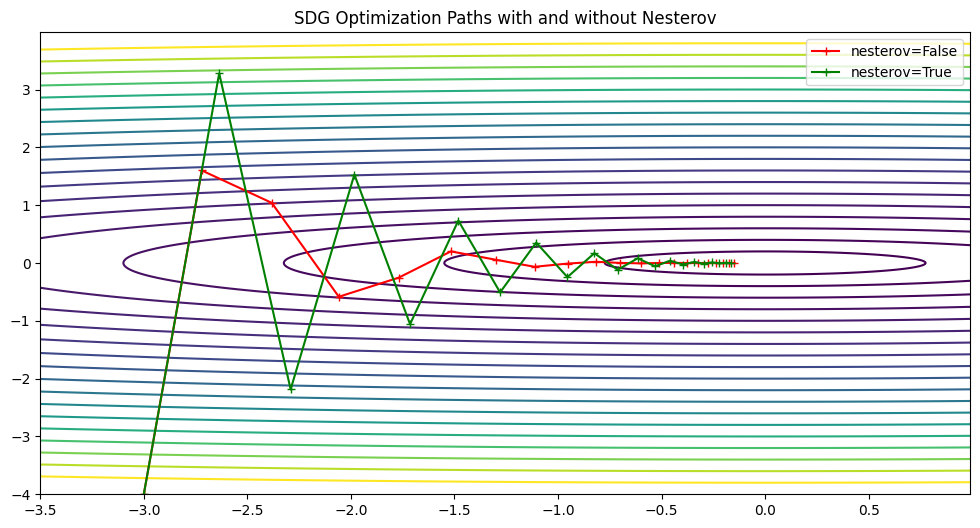

In [9]:
n_epochs = 20

plt.figure(1, figsize=(12,6))
plot_contours([-3.5, 1., -4., 4.], 4., test_function)

lr = 0.7
beta_1 = 0.3
nests = [False, True]
colors = ['r', 'g']

for nest, color in zip(nests, colors):
    x = torch.tensor([-3.0,-4.0], requires_grad=True)
    optimizer = torch.optim.SGD([x],lr=lr, momentum=beta_1, nesterov=nest)

    xhist, yhist = optimize(test_function, x, n_epochs, optimizer)

    plt.plot(xhist, yhist, color=color, marker='+', label=f'nesterov={nest}')
    print(f'SGD - nesterov={nest}, error:{error(xhist, yhist)}')

plt.legend()
plt.title('SDG Optimization Paths with and without Nesterov')
plt.show()

### d) RMSProp Optimization Paths with Different Decay Parameters $\beta_2$

RMSProp - beta_2=0.99, error: 0.000, ( 0.000, -0.000)
RMSProp - beta_2=0.9, error: 0.017, (-0.000, -0.017)
RMSProp - beta_2=0.6, error: 0.002, (-0.002, -0.000)


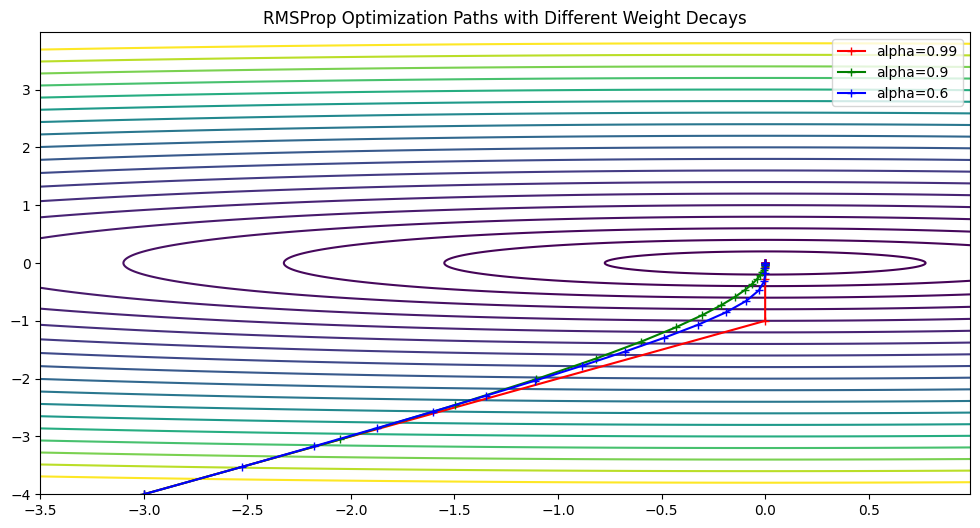

In [ ]:
n_epochs = 20

plt.figure(1, figsize=(12,6))
plot_contours([-3.5, 1., -4., 4.], 4., test_function)

lr = 0.3
beta_2s = [0.99, 0.9, 0.6]
colors = ['r', 'g', 'b']

for beta_2, color in zip(beta_2s, colors):
    x = torch.tensor([-3.0,-4.0], requires_grad=True)
    optimizer = torch.optim.RMSprop([x],lr=lr, alpha=beta_2)

    xhist, yhist = optimize(test_function, x, n_epochs, optimizer)
    
    plt.plot(xhist, yhist, color=color, marker='+', label=f'beta_2={beta_2}')
    print(f'RMSProp - beta_2={beta_2}, error:{error(xhist, yhist)}')

plt.legend()
plt.title('RMSProp Optimization Paths with Different Weight Decays')
plt.show()

### e) Adam Optimization Paths with Different Parameters

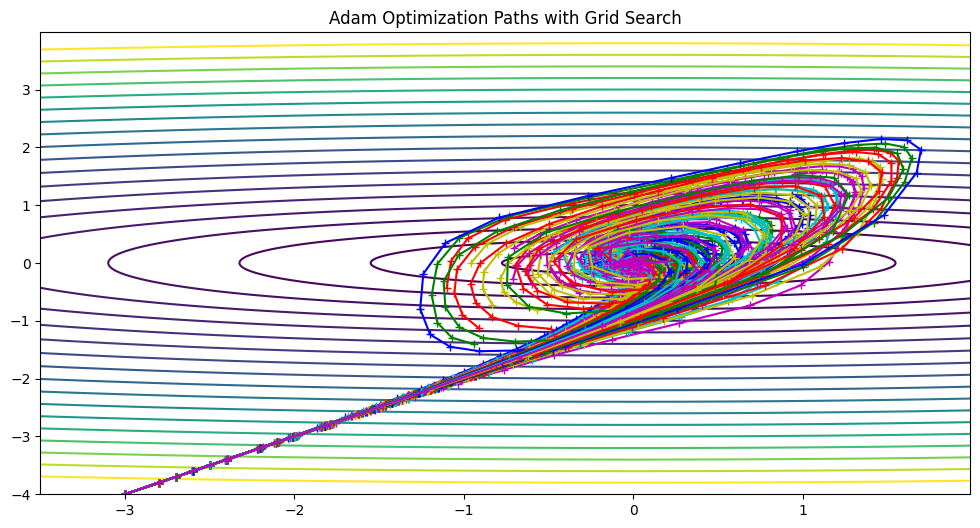

Best parameters: lr=0.5, beta_1=0.5, beta_2=0.999 with final loss=0.00049


In [17]:
import itertools

n_epochs = 25

plt.figure(1, figsize=(12,6))
plot_contours([-3.5, 2., -4., 4.], 4., test_function)

learning_rates = [0.2, 0.3, 0.4, 0.5, 0.6]
beta_1s = [0.9, 0.8, 0.7, 0.6, 0.5]
beta_2s = [0.999, 0.888, 0.777, 0.666, 0.555]
colors = ['r', 'g', 'b', 'c', 'm', 'y']

best_params = None
best_loss = float('inf')

for i, (lr, beta_1, beta_2) in enumerate(itertools.product(learning_rates, beta_1s, beta_2s)):
    color = colors[i % len(colors)]
    x = torch.tensor([-3.0,-4.0], requires_grad=True)
    optimizer = torch.optim.Adam([x],lr=lr, betas=(beta_1, beta_2))

    xhist, yhist = optimize(test_function, x, n_epochs, optimizer)
    final_loss = np.sqrt(xhist[-1]**2 + yhist[-1]**2)
    plt.plot(xhist, yhist, color=color, marker='+', label=f'lr={lr}, betas={(beta_1, beta_2)}')

    if final_loss < best_loss:
        best_loss = final_loss
        best_params = (lr, beta_1, beta_2)

# plt.legend()
plt.title('Adam Optimization Paths with Grid Search')
plt.show()

print(f'Best parameters: lr={best_params[0]}, beta_1={best_params[1]}, beta_2={best_params[2]} with final loss={best_loss:.5f}')